# Tests estadísticos

## Test de normalidad

Los test de normalidad son una serie de técnicas estadísticas que se utilizan para determinar si una muestra de datos se ajusta a una distribución normal. Existen varios test de normalidad, entre los más comunes se encuentran:
  * Test de Shapiro-Wilk
  * Test de Kolmogorov-Smirnov
  * Test de Lilliefors
  * Test de Anderson-Darling

Los test usan la siguiente prueba de hipótesis:
  * Hipótesis nula (H0): La muestra de datos proviene de una distribución normal.
  * Hipótesis alternativa (H1): La muestra de datos no proviene de una distribución normal.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
diabetes = pd.read_csv('../data/Diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Realizamos una prueba de normalidad para la variable 'Glucose' utilizando el test de Shapiro-Wilk.

In [24]:
stats.shapiro(diabetes['Glucose'].sample(50))

ShapiroResult(statistic=0.9541516527074998, pvalue=0.05064613331742604)

In [46]:
def sample_shapiro(col, n=1000, sample=50):
    p_values= []
    for i in range(n):
        p_value = stats.shapiro(col.sample(sample))[1]
        p_values.append(p_value)
    
    print(pd.Series(p_values).describe())
    a = sns.histplot(p_values, kde=True)
    plt.show()
    return np.round(p_values,4)

count   1000.00
mean       0.15
std        0.22
min        0.00
25%        0.01
50%        0.04
75%        0.17
max        0.98
dtype: float64


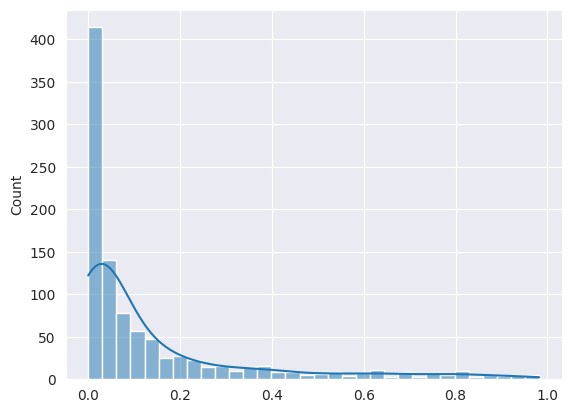

array([2.740e-02, 2.840e-02, 6.938e-01, 2.200e-02, 2.621e-01, 2.214e-01,
       3.040e-02, 1.270e-02, 1.000e-04, 2.193e-01, 8.023e-01, 3.080e-02,
       4.800e-03, 9.800e-03, 3.880e-02, 3.150e-02, 2.600e-03, 2.600e-02,
       1.000e-03, 3.506e-01, 7.405e-01, 9.350e-02, 3.210e-02, 1.050e-02,
       1.380e-02, 1.790e-02, 4.579e-01, 7.700e-03, 5.660e-02, 1.647e-01,
       8.110e-02, 2.570e-02, 1.167e-01, 1.200e-02, 9.060e-02, 7.670e-02,
       3.150e-02, 4.160e-02, 8.800e-03, 1.000e-04, 8.980e-01, 8.700e-03,
       1.744e-01, 3.320e-02, 3.570e-01, 5.107e-01, 1.270e-02, 6.300e-01,
       5.000e-04, 1.100e-02, 2.261e-01, 5.330e-02, 5.955e-01, 9.020e-02,
       1.300e-03, 1.300e-02, 2.230e-02, 5.875e-01, 2.709e-01, 2.940e-02,
       1.590e-02, 2.380e-02, 8.065e-01, 2.600e-03, 1.787e-01, 3.070e-02,
       2.740e-02, 2.570e-02, 7.800e-02, 1.790e-02, 7.766e-01, 5.970e-02,
       1.930e-02, 6.400e-03, 3.990e-02, 7.963e-01, 4.880e-02, 7.400e-03,
       2.100e-03, 2.630e-02, 4.700e-03, 2.000e-02, 

In [47]:
sample_shapiro(diabetes['Glucose'])

count   1000.00
mean       0.15
std        0.24
min        0.00
25%        0.00
50%        0.01
75%        0.23
max        0.99
dtype: float64


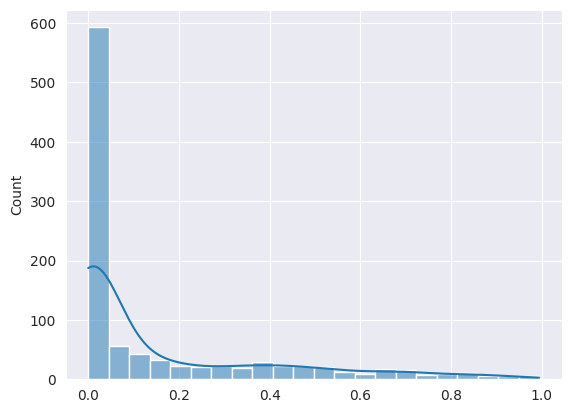

array([3.200e-03, 2.822e-01, 2.000e-04, 3.751e-01, 3.000e-04, 4.050e-02,
       0.000e+00, 5.530e-02, 1.760e-02, 0.000e+00, 5.174e-01, 5.000e-04,
       5.894e-01, 2.000e-04, 2.600e-03, 2.900e-03, 3.628e-01, 1.230e-02,
       3.299e-01, 4.000e-04, 2.530e-02, 1.800e-03, 3.131e-01, 6.274e-01,
       4.536e-01, 6.083e-01, 1.000e-02, 4.620e-02, 3.697e-01, 5.697e-01,
       2.400e-03, 6.525e-01, 1.400e-03, 1.400e-03, 1.063e-01, 3.500e-03,
       5.400e-02, 8.000e-04, 1.108e-01, 1.186e-01, 1.000e-04, 1.978e-01,
       2.500e-03, 8.000e-04, 6.550e-02, 4.000e-04, 9.702e-01, 3.680e-01,
       1.100e-03, 1.000e-04, 7.000e-04, 1.000e-04, 6.000e-02, 1.350e-02,
       5.900e-03, 5.543e-01, 1.280e-01, 1.480e-02, 9.000e-03, 3.600e-03,
       6.690e-02, 2.000e-04, 2.110e-02, 2.000e-04, 7.781e-01, 2.000e-04,
       0.000e+00, 4.100e-02, 8.410e-02, 1.000e-04, 1.450e-02, 3.100e-03,
       2.000e-04, 1.000e-04, 3.000e-04, 3.000e-04, 5.000e-04, 8.527e-01,
       0.000e+00, 4.790e-02, 5.000e-04, 3.190e-01, 

In [48]:
sample_shapiro(diabetes['BMI'])

count   1000.00
mean       0.00
std        0.01
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.23
dtype: float64


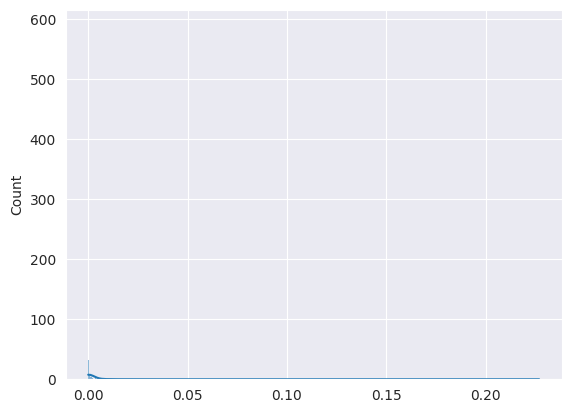

array([4.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e-04,
       0.000e+00, 2.000e-04, 0.000e+00, 0.000e+00, 5.000e-04, 5.380e-02,
       0.000e+00, 0.000e+00, 0.000e+00, 4.180e-02, 2.000e-04, 0.000e+00,
       2.000e-04, 1.000e-04, 0.000e+00, 1.500e-03, 1.000e-04, 0.000e+00,
       0.000e+00, 7.800e-03, 3.000e-04, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e-04, 0.000e+00, 1.000e-04, 0.000e+00, 0.000e+00, 2.500e-03,
       8.300e-03, 1.000e-04, 0.000e+00, 0.000e+00, 1.000e-04, 1.000e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.030e-02, 1.000e-04,
       0.000e+00, 0.000e+00, 3.400e-03, 5.000e-04, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04, 0.000e+00,
       5.000e-04, 0.000e+00, 1.900e-03, 0.000e+00, 2.000e-04, 0.000e+00,
       0.000e+00, 2.000e-04, 2.600e-03, 0.000e+00, 0.000e+00, 6.000e-04,
       1.000e-04, 2.210e-02, 0.000e+00, 0.000e+00, 4.700e-03, 0.000e+00,
       2.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 

In [51]:
sample_shapiro(diabetes['DiabetesPedigreeFunction'])

count   1000.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
dtype: float64


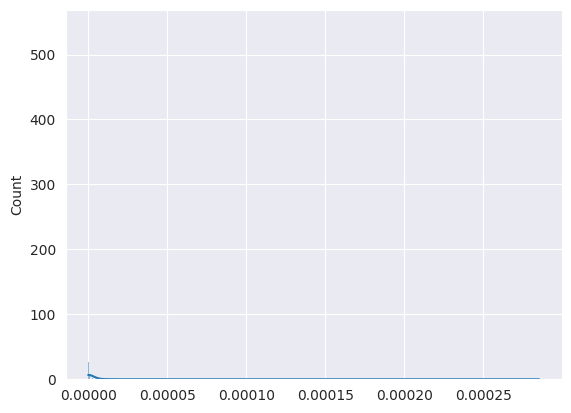

array([0.    , 0.    , 0.    , 0.0003, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

In [63]:
sample_shapiro(diabetes['Insulin'])

In [15]:
kolmogorov_smirnov = stats.kstest(diabetes['Glucose'], 'norm')
kolmogorov_smirnov

KstestResult(statistic=0.9934895833333334, pvalue=0.0, statistic_location=44, statistic_sign=-1)

Realizamos el test de lilliefors para la variable 'Glucose'.

In [7]:
from statsmodels.stats.diagnostic import lilliefors

In [8]:
# Perform the Lilliefors test
statistic, p_value = lilliefors(diabetes['Glucose'])

print(f'Statistic: {statistic}')
print(f'p-value: {p_value}')

Statistic: 0.06399847607594411
p-value: 0.0009999999999998899


In [16]:
# Perform the Lilliefors test
statistic, p_value = lilliefors(diabetes['BMI'])

print(f'Statistic: {statistic}')
print(f'p-value: {p_value}')

Statistic: 0.048562365082833646
p-value: 0.0009999999999998899


In [17]:
# Perform the Lilliefors test
statistic, p_value = lilliefors(diabetes['DiabetesPedigreeFunction'])

print(f'Statistic: {statistic}')
print(f'p-value: {p_value}')

Statistic: 0.12396702389194851
p-value: 0.0009999999999998899


## Test para dos variables numéricas

Para comparar dos variables numéricas se pueden utilizar los siguientes test:
  * Test de correlación de Pearson: Este test mide la fuerza de la relación lineal entre dos variables continuas y normales.
  * Test de correlación de Spearman: Este test mide la fuerza de la relación entre dos variables continuas, sin asumir que la relación es lineal.
  * Test de correlación de Kendall: Este test mide la fuerza de la relación entre dos variables continuas, sin asumir que la relación es lineal.
  * Test de correlación de Point-Biserial: Este test mide la relación entre una variable continua y una variable dicotómica.
  * Test de correlación de Biserial: Este test mide la relación entre una variable continua y una variable dicotómica.
  * Test de correlación de Tau de Kendall: Este test mide la relación entre dos variables ordinales.
  * Test de correlación de Tau de Somers: Este test mide la relación entre dos variables ordinales.
  * Test de correlación de Tau de Goodman y Kruskal: Este test mide la relación entre dos variables ordinales.

La prueba de hipótesis de un test de correlación se utiliza para determinar si existe una relación significativa entre dos variables. Aquí están las hipótesis para un test de correlación:  

Hipótesis nula (H0): No existe una relación significativa entre las dos variables. En términos de correlación, esto significa que la correlación es igual a 0.

Hipótesis alternativa (H1): Existe una relación significativa entre las dos variables. En términos de correlación, esto significa que la correlación es diferente de 0.

Para realizar la prueba de hipótesis, se calcula un valor p a partir de los datos. Si el valor p es menor que el nivel de significancia (generalmente 0.05), entonces se rechaza la hipótesis nula y se concluye que existe una relación significativa entre las dos variables. Si el valor p es mayor que el nivel de significancia, entonces no se puede rechazar la hipótesis nula y se concluye que no existe una relación significativa entre las dos variables.

La forma matemática de la correlación de Pearson es la siguiente:

$$r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}$$

La forma matemática de la correlación de Spearman es la siguiente:

$$r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

Para calcular estos test se debe primero hallar la matriz de correlación. Para ello se puede utilizar el método `corr` de pandas. Luego se puede utilizar el método `corr` de scipy para calcular el test de correlación.

Donde $d_i$ es la diferencia entre los rangos de las dos variables para la i-ésima observación y n es el número de observaciones.

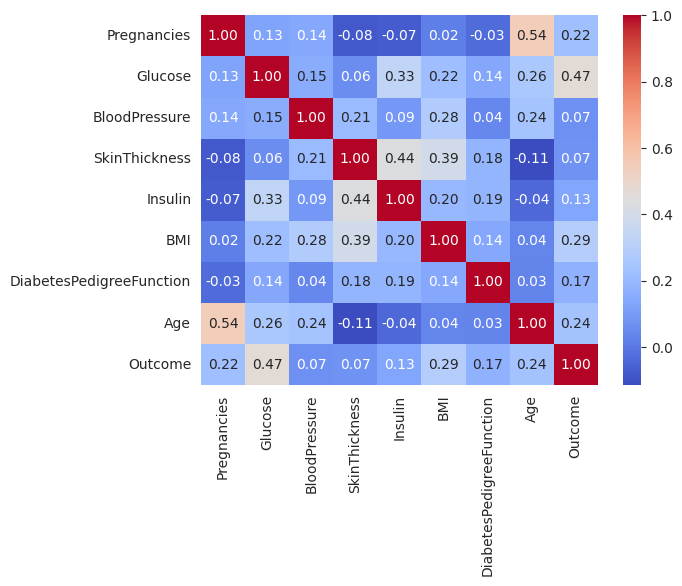

In [11]:
sns.heatmap(diabetes.corr('pearson'), annot=True, cmap='coolwarm', fmt='.2f' )
plt.show()

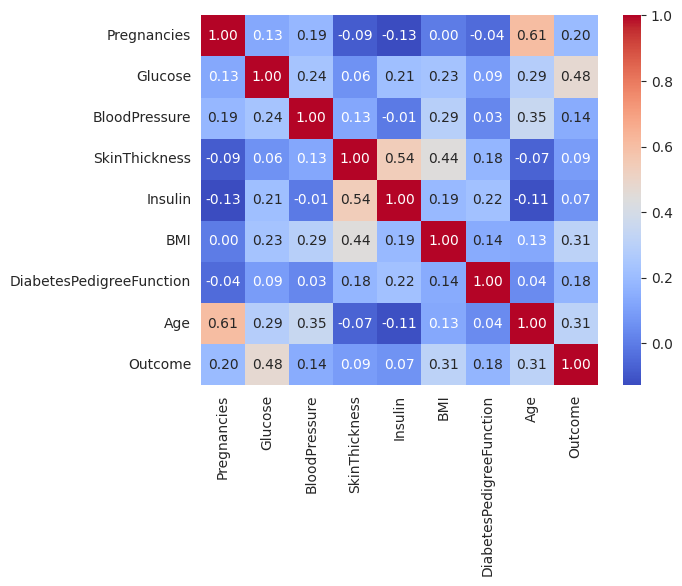

In [12]:
sns.heatmap(diabetes.corr('spearman'), annot=True, cmap='coolwarm', fmt='.2f' )
plt.show()

In [13]:
stats.spearmanr(diabetes['Glucose'], diabetes['Outcome'])

SignificanceResult(statistic=0.4757763064583268, pvalue=1.2305781575825131e-44)

### Test para una variable numérica y una variable categórica


Para comparar una variable numérica y una variable categórica se pueden utilizar los siguientes test:
  * Test t de Student: Este test se utiliza para comparar las medias de dos grupos.
  * Test de Welch: Este test se utiliza para comparar las medias de dos grupos cuando las varianzas de los dos grupos no son iguales.
  * Test de Mann-Whitney U: Este test se utiliza para comparar las medianas de dos grupos.
  * Test de Kruskal-Wallis: Este test se utiliza para comparar las medianas de más de dos grupos.
  * Test de ANOVA: Este test se utiliza para comparar las medias de más de dos grupos.
  * Test de Friedman: Este test se utiliza para comparar las medianas de más de dos grupos emparejados.

#### Test t para variables normales

Para realizar estos test se puede utilizar el método `ttest_ind` de scipy.

In [53]:
stats.ttest_ind(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Glucose'])

TtestResult(statistic=-14.600060005973894, pvalue=8.935431645289913e-43, df=766.0)

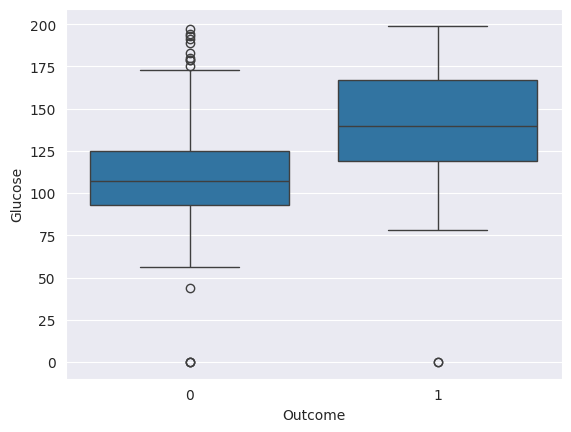

In [56]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes)
plt.show()

In [54]:
stats.ttest_ind(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['SkinThickness'])

TtestResult(statistic=49.27689440711156, pvalue=1.0170329817379368e-239, df=766.0)

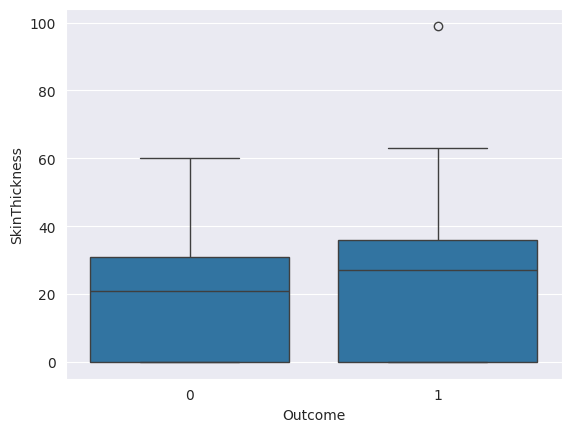

In [57]:
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes)
plt.show()

In [55]:
stats.ttest_ind(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Insulin'])

TtestResult(statistic=1.5065853031165115, pvalue=0.13232925006862623, df=766.0)

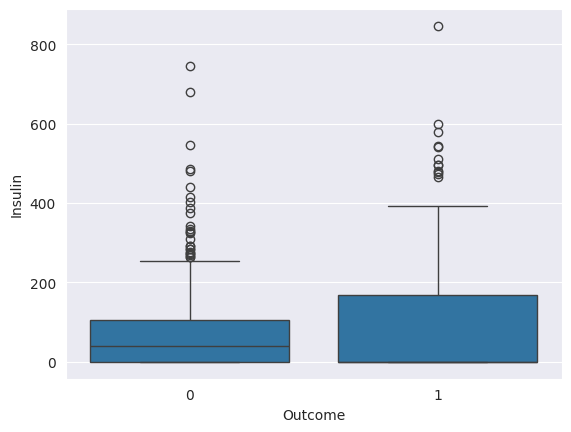

In [58]:
sns.boxplot(x='Outcome', y='Insulin', data=diabetes)
plt.show()

#### Test de Mann-Whitney U para variables no normales

In [59]:
stats.mannwhitneyu(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Glucose'])

MannwhitneyuResult(statistic=28390.5, pvalue=1.2007268419877137e-39)

In [60]:
stats.mannwhitneyu(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['SkinThickness'])

MannwhitneyuResult(statistic=133133.5, pvalue=5.71350213091459e-113)

In [62]:
stats.mannwhitneyu(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Insulin'])

MannwhitneyuResult(statistic=80941.0, pvalue=1.8221080770934267e-06)

#### Test de Kruskal-Wallis para más de dos grupos no normales

In [64]:
stats.kruskal(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Insulin'])

KruskalResult(statistic=22.775670056004778, pvalue=1.8205597768032835e-06)

#### Test de ANOVA para más de dos grupos normales

In [61]:
stats.f_oneway(diabetes[diabetes['Outcome'] == 0]['Glucose'], diabetes[diabetes['Outcome'] == 1]['Insulin'])

F_onewayResult(statistic=2.269799275566669, pvalue=0.13232925006860224)

### Test para dos variables categóricas

Para comparar dos variables categóricas se pueden utilizar los siguientes test:
  * Test de Chi-cuadrado: Este test se utiliza para comparar la frecuencia de dos variables categóricas.
  * Test exacto de Fisher: Este test se utiliza para comparar la frecuencia de dos variables categóricas cuando el test de Chi-cuadrado no es apropiado.
  * Test de McNemar: Este test se utiliza para comparar la frecuencia de dos variables categóricas emparejadas.
  * Test de Cochran: Este test se utiliza para comparar la frecuencia de dos variables categóricas emparejadas con más de dos grupos.

In [69]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [75]:
diabetes['high_glucose'] = np.where(diabetes['Glucose'] > 150, 1, 0)

In [76]:
pd.crosstab(diabetes['Outcome'], diabetes['high_glucose'])

high_glucose,0,1
Outcome,,
0,465,35
1,163,105


In [77]:
stats.chi2_contingency(pd.crosstab(diabetes['Outcome'], diabetes['high_glucose']))

Chi2ContingencyResult(statistic=119.05742453519481, pvalue=1.0174109186353839e-27, dof=1, expected_freq=array([[408.85416667,  91.14583333],
       [219.14583333,  48.85416667]]))

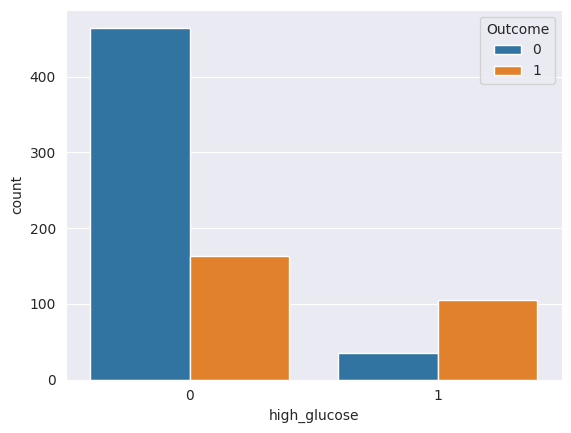

In [84]:
sns.countplot(x='high_glucose', hue='Outcome', data=diabetes)
plt.show()

Ahora calculamos el test con una vraible calculada como Age_Group.

In [78]:
diabetes['Age_Group'] = pd.cut(diabetes['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Adult', 'Old'])

In [79]:
pd.crosstab(diabetes['Outcome'], diabetes['Age_Group'])

Age_Group,Young,Adult,Old
Outcome,,,
0,327,153,20
1,90,171,7


In [80]:
stats.chi2_contingency(pd.crosstab(diabetes['Outcome'], diabetes['Age_Group']))

Chi2ContingencyResult(statistic=79.09118121622106, pvalue=6.692189270221932e-18, dof=2, expected_freq=array([[271.484375, 210.9375  ,  17.578125],
       [145.515625, 113.0625  ,   9.421875]]))

In [81]:
stats.chi2_contingency(pd.crosstab(diabetes['Outcome'], diabetes['Age_Group']))[1] < 0.05

True

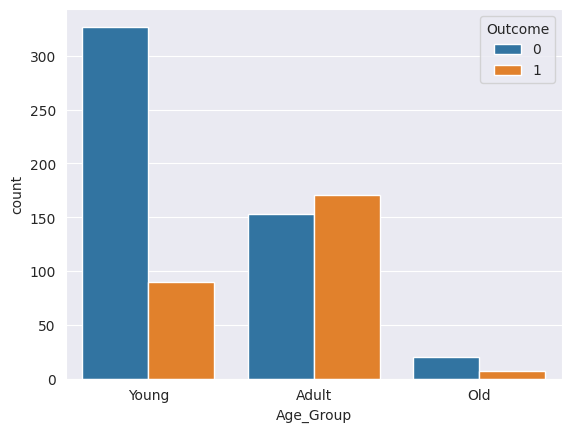

In [83]:
sns.countplot(x='Age_Group', hue='Outcome', data=diabetes)
plt.show()

## Resúmenes de variables agrupadas en estadística descriptiva bivariada

A continuación se usan algunas variables resumen condicionadas a la variable de interés.

In [27]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']})

Glucose                           
               mean        std median min  max
Outcome                                       
0        109.980000  26.141200  107.0   0  197
1        141.257463  31.939622  140.0   0  199

In [28]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']}).T

Outcome                0           1
Glucose mean    109.9800  141.257463
        std      26.1412   31.939622
        median  107.0000  140.000000
        min       0.0000    0.000000
        max     197.0000  199.000000

In [29]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']}).T.style.format('{:.2f}')

In [30]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']}).T.style.format('{:.2f}').background_gradient(cmap='coolwarm')

In [31]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']}).T.style.format('{:.2f}').background_gradient(cmap='coolwarm', axis=1)

In [34]:
diabetes.groupby('Outcome').agg({'Glucose': ['mean', 'std', 'median', 'min', 'max']}).T.style.format('{:.2f}').background_gradient(cmap='coolwarm', axis=0)

# Estadística descriptiva multivariadaa

La estadística descriptiva multivariada es el estudio de dos o más variables simultáneamente. La estadística descriptiva multivariada se utiliza para resumir y describir las relaciones entre dos o más variables. Algunas técnicas comunes de estadística descriptiva multivariada incluyen:
  * Análisis de correlación
  * Análisis de regresión
  * Análisis de componentes principales
  * Análisis de conglomerados
  * Análisis de discriminante
  * Análisis de factores
  * Análisis de correspondencia
  * Análisis de escalas multidimensionales
  * Análisis de trayectoria
  * Análisis de series temporales
  * Análisis de supervivencia
  * Análisis de varianza multivariante
  * Análisis de regresión multivariante
  * Análisis de covarianza multivariante
  * Análisis de conglomerados multivariante
  * Análisis de correspondencia multivariante
  * Análisis de escalas multidimensionales multivariante
  * Análisis de trayectoria multivariante
  * Análisis de series temporales multivariante
  * Análisis de supervivencia multivariante
  * Análisis de varianza multivariante multivariante
  * Análisis de regresión multivariante multivariante
  * Análisis de covarianza multivariante multivariante
  * Análisis de conglomerados multivariante multivariante
  * Análisis de correspondencia multivariante multivariante
  * Análisis de escalas multidimensionales multivariante multivariante
  * Análisis de trayectoria multivariante multivariante
  * Análisis de series temporales multivariante multivariante
  * Análisis de supervivencia multivariante multivariante
  * Análisis de varianza multivariante multivariante multivariante
  * Análisis de regresión multivariante multivariante multivariante

## Análisis de conglomerados

El análisis de conglomerados es una técnica de estadística descriptiva multivariada que se utiliza para agrupar observaciones en grupos o conglomerados. Los grupos se forman de tal manera que las observaciones dentro de un grupo son más similares entre sí que con las observaciones en otros grupos. El análisis de conglomerados se utiliza para identificar patrones en los datos y para explorar la estructura de los datos. Algunas aplicaciones comunes del análisis de conglomerados incluyen:
  * Segmentación de mercado
  * Análisis de redes sociales
  * Análisis de texto
  * Análisis de imágenes
  * Análisis de genómica

### Cluster jerárquico

El análisis de conglomerados jerárquico es una técnica de análisis de conglomerados que se utiliza para agrupar observaciones en grupos o conglomerados de manera jerárquica. Los grupos se forman de tal manera que las observaciones dentro de un grupo son más similares entre sí que con las observaciones en otros grupos. El análisis de conglomerados jerárquico se utiliza para identificar patrones en los datos y para explorar la estructura de los datos. Algunas aplicaciones comunes del análisis de conglomerados jerárquico incluyen:
  * Segmentación de mercado
  * Análisis de redes sociales
  * Análisis de texto
  * Análisis de imágenes
  * Análisis de genómica

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [37]:
Z = linkage(diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], 'ward')

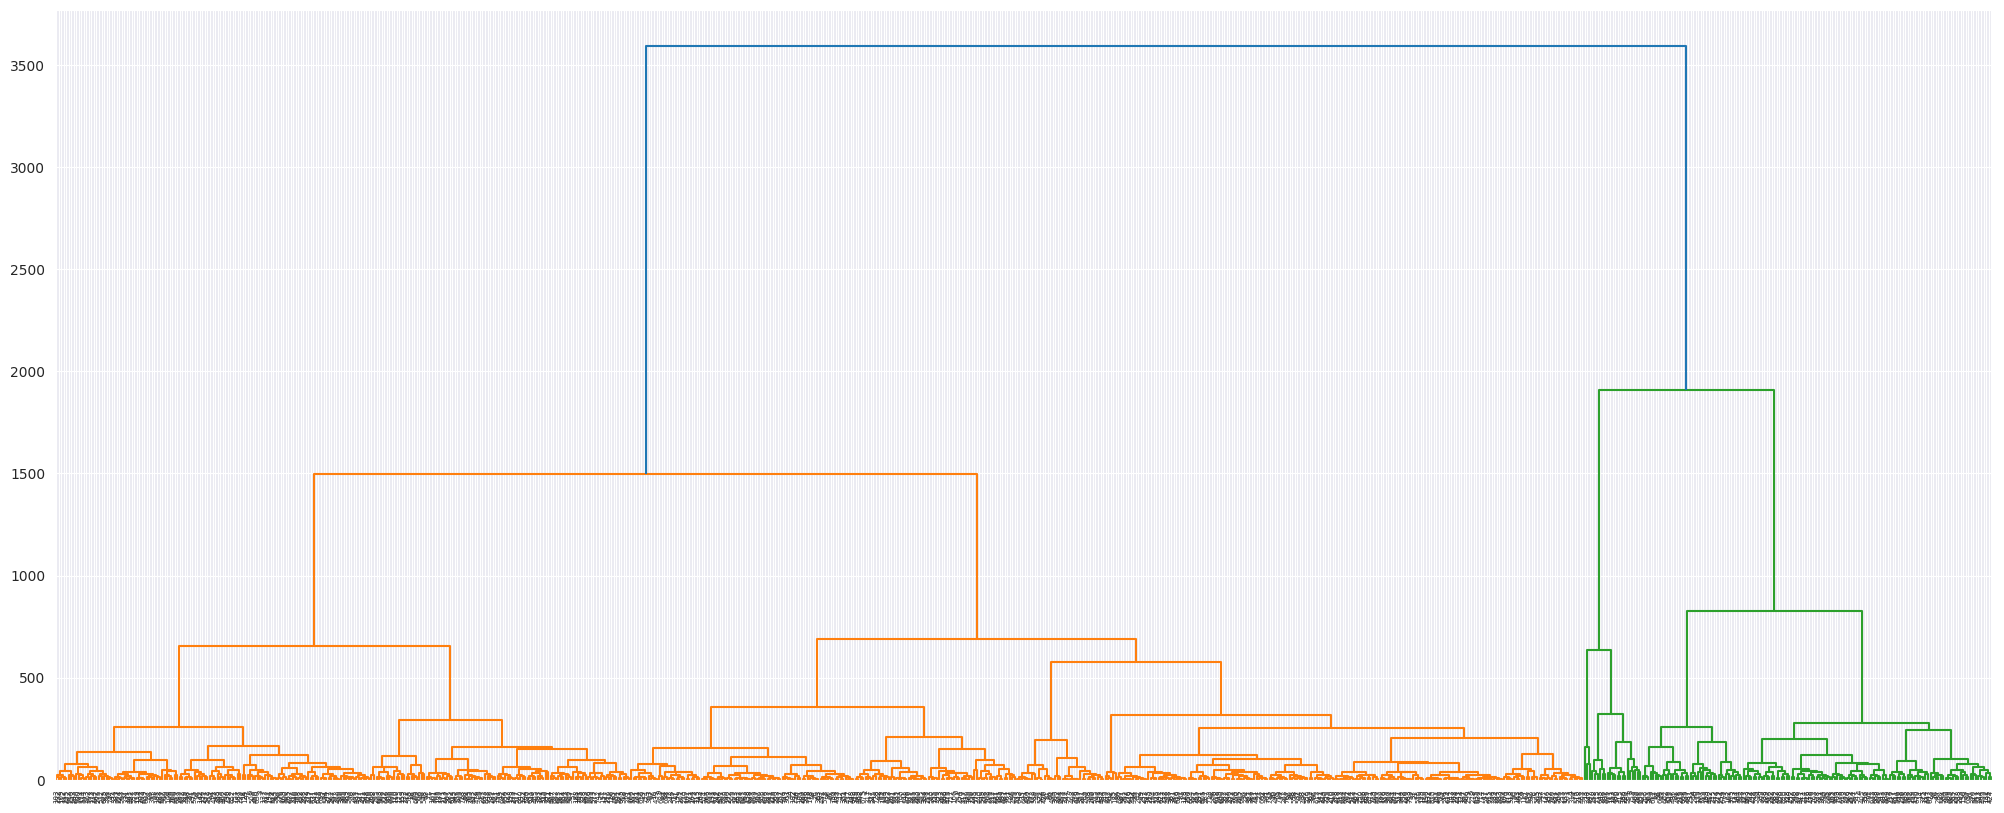

In [44]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()